In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [2]:
loan=pd.read_csv('C:/Users/HUGO/Downloads/loan_data.csv')
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
#see the values of columns
for e in loan.columns:
    x=loan[e].value_counts()
    print(x)
    

1    7710
0    1868
Name: credit.policy, dtype: int64
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1941      1
0.1741      1
0.1620      1
0.1746      1
0.1756      1
Name: int.rate, Length: 249, dtype: int64
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
248.43     1
181.57     1
197.18     1
515.46     1
258.68     1
Name: installment, Length: 4788, dtype: int64
11.002100    308
10.819778    248
10.596635    224
10.308953    224
10.714418    221
            ... 
9.229358       1
10.381087      1
10.471638      1
11.492641      1
12.223421      1
Name: log.annual.inc, Length: 1987, dtype: int64
0.00     89
10.00    19
0.60     16
13.16    13
19.20    13
         ..
28.70     1
13.48     1
8.07      1


In [5]:
#see the dtypes of columns
for e in loan.columns:
    print(loan[e].dtype)

int64
object
float64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64


In [79]:
#transform log annual income
#loan['annual.inc']=np.exp(loan['log.annual.inc'])
#loan = loan.drop('log.annual.inc', 1)
loan

,credit.policy,purpose,int.rate,installment,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual.inc
0,1,3,0.1189,829.10,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385
1,1,2,0.1071,228.22,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073
2,1,3,0.1357,366.86,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943
3,1,3,0.1008,162.34,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385
4,1,2,0.1426,102.92,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.000479
9574,0,1,0.1253,257.70,0.21,722,4380.000000,184,1.1,5,0,0,1,68999.999753
9575,0,3,0.1071,97.81,13.09,687,3450.041667,10036,82.9,8,0,0,1,39999.999876
9576,0,5,0.1600,351.58,19.18,692,1800.000000,0,3.2,5,0,0,1,49999.999779


In [80]:
#convert purpose to str
loan['purpose']=loan['purpose'].astype('str')

#label purpose
labelE=preprocessing.LabelEncoder()
loan['purpose']=labelE.fit_transform(loan['purpose'])
loan['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int32

In [81]:
#adding one to purpose so we do not start from 0
loan['purpose']=(loan['purpose']+1)
loan['purpose']

0       3
1       2
2       3
3       3
4       2
       ..
9573    1
9574    1
9575    3
9576    5
9577    3
Name: purpose, Length: 9578, dtype: int32

In [82]:
#converting purpose to dummies:
d=['purpose']
loan_dummy=pd.get_dummies(loan, columns=d)
loan_dummy


,credit.policy,int.rate,installment,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual.inc,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7
0,1,0.1189,829.10,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,0,0,1,0,0,0,0
1,1,0.1071,228.22,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,0,1,0,0,0,0,0
2,1,0.1357,366.86,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,0,0,1,0,0,0,0
3,1,0.1008,162.34,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,0,0,1,0,0,0,0
4,1,0.1426,102.92,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.000479,1,0,0,0,0,0,0
9574,0,0.1253,257.70,0.21,722,4380.000000,184,1.1,5,0,0,1,68999.999753,1,0,0,0,0,0,0
9575,0,0.1071,97.81,13.09,687,3450.041667,10036,82.9,8,0,0,1,39999.999876,0,0,1,0,0,0,0
9576,0,0.1600,351.58,19.18,692,1800.000000,0,3.2,5,0,0,1,49999.999779,0,0,0,0,1,0,0


In [83]:
for e in loan_dummy.columns:
    print(loan_dummy[e].dtype)

int64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64
float64
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [84]:
for e in loan_dummy.columns:
    print(e)

credit.policy
int.rate
installment
dti
fico
days.with.cr.line
revol.bal
revol.util
inq.last.6mths
delinq.2yrs
pub.rec
not.fully.paid
annual.inc
purpose_1
purpose_2
purpose_3
purpose_4
purpose_5
purpose_6
purpose_7


In [85]:
#rename columns:
loan_dummy.rename(columns={'purpose_1':'ppse_allOther','purpose_2':'ppse_CreditCard','purpose_3':'ppse_DebtConsol','purpose_4':'ppse_Educ','purpose_5':'ppse_HomeImprov','purpose_6':'ppse_MajPurchase','purpose_7':'ppse_SmallBusiness'},inplace=True)

In [86]:
#selecting columns based on positive condition:

columnas=['ppse_allOther','ppse_CreditCard','ppse_DebtConsol','ppse_Educ','ppse_HomeImprov','ppse_MajPurchase','ppse_SmallBusiness']

for e in loan_dummy[columnas]:
    x=loan_dummy[e].value_counts()
    print(x)
    
# loan_dummy['purpose_7'].value_counts()

0    7247
1    2331
Name: ppse_allOther, dtype: int64
0    8316
1    1262
Name: ppse_CreditCard, dtype: int64
0    5621
1    3957
Name: ppse_DebtConsol, dtype: int64
0    9235
1     343
Name: ppse_Educ, dtype: int64
0    8949
1     629
Name: ppse_HomeImprov, dtype: int64
0    9141
1     437
Name: ppse_MajPurchase, dtype: int64
0    8959
1     619
Name: ppse_SmallBusiness, dtype: int64


In [13]:
signif=(0.05*len(loan))
signif

478.90000000000003

In [87]:
#drop purpose columns based on previous condition

cols=[]
for e in loan_dummy[columnas]:
    x=len(loan_dummy[loan_dummy[e]==1])
    if x < signif:
        cols.append(e)
    else:
        pass
cols    
    

['ppse_Educ', 'ppse_MajPurchase']

In [88]:
#drop those columns:

loan_dummy=loan_dummy.drop(cols, axis=1)
loan_dummy

,credit.policy,int.rate,installment,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual.inc,ppse_allOther,ppse_CreditCard,ppse_DebtConsol,ppse_HomeImprov,ppse_SmallBusiness
0,1,0.1189,829.10,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,0,0,1,0,0
1,1,0.1071,228.22,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,0,1,0,0,0
2,1,0.1357,366.86,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,0,0,1,0,0
3,1,0.1008,162.34,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,0,0,1,0,0
4,1,0.1426,102.92,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.000479,1,0,0,0,0
9574,0,0.1253,257.70,0.21,722,4380.000000,184,1.1,5,0,0,1,68999.999753,1,0,0,0,0
9575,0,0.1071,97.81,13.09,687,3450.041667,10036,82.9,8,0,0,1,39999.999876,0,0,1,0,0
9576,0,0.1600,351.58,19.18,692,1800.000000,0,3.2,5,0,0,1,49999.999779,0,0,0,1,0


In [89]:
loan_dummy.isnull().any()

credit.policy         False
int.rate              False
installment           False
dti                   False
fico                  False
days.with.cr.line     False
revol.bal             False
revol.util            False
inq.last.6mths        False
delinq.2yrs           False
pub.rec               False
not.fully.paid        False
annual.inc            False
ppse_allOther         False
ppse_CreditCard       False
ppse_DebtConsol       False
ppse_HomeImprov       False
ppse_SmallBusiness    False
dtype: bool

In [90]:
for e in loan_dummy.columns:
    print(loan_dummy[e].dtype)

int64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64
float64
uint8
uint8
uint8
uint8
uint8


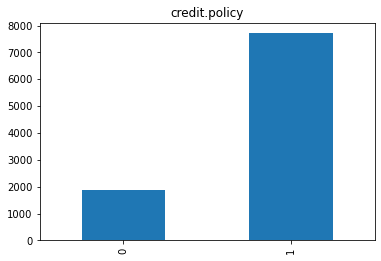

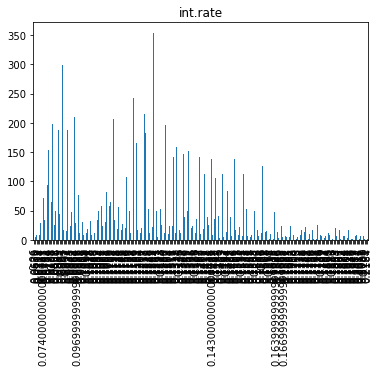

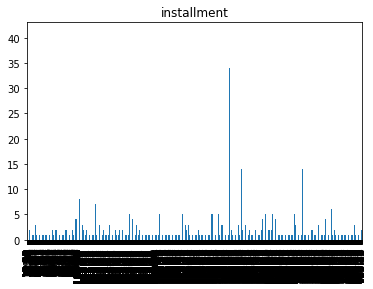

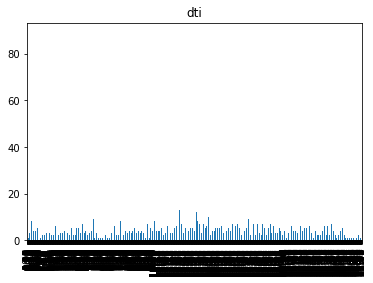

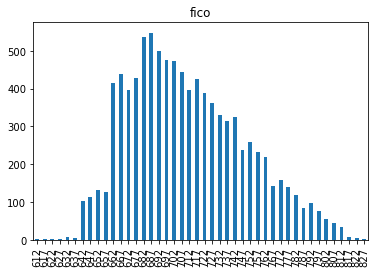

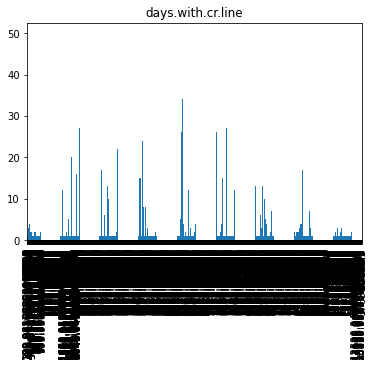

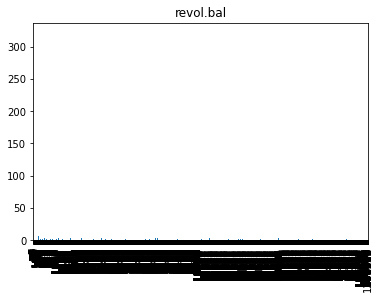

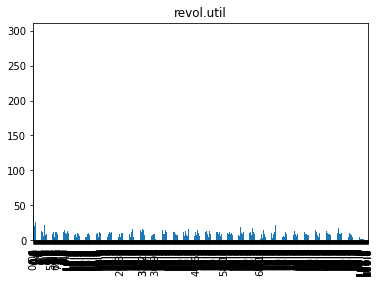

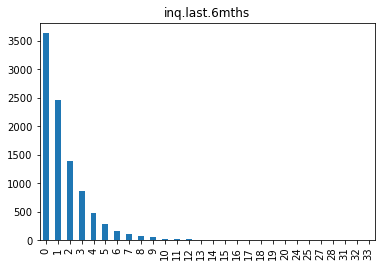

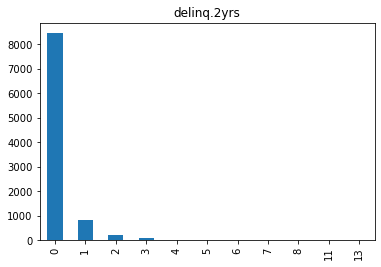

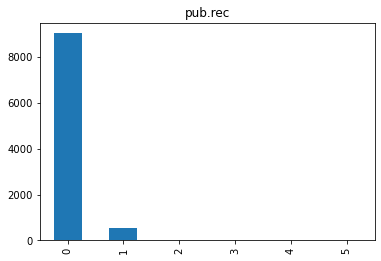

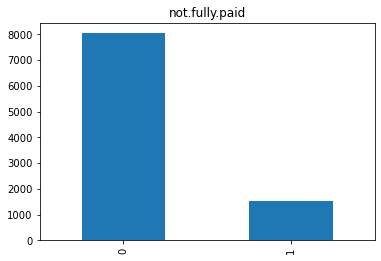

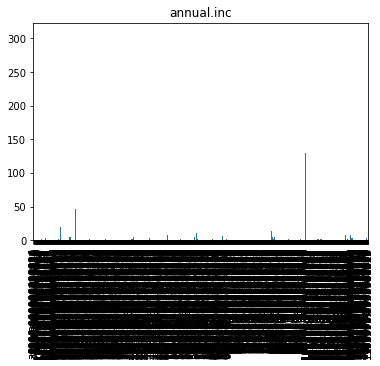

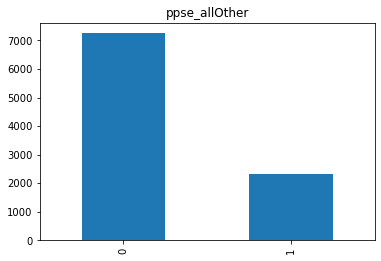

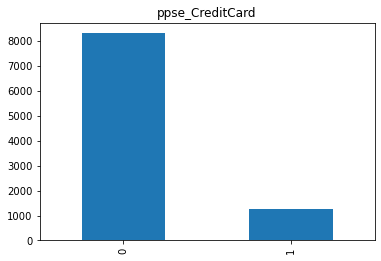

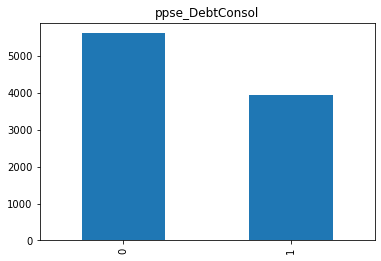

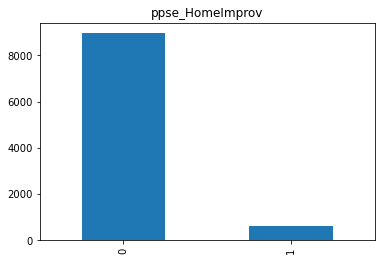

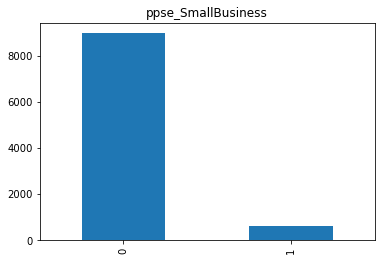

In [91]:
#histograms

for e in loan_dummy:
    loan_dummy[e].value_counts().sort_index().plot.bar(title=e)  
    plt.show()

In [92]:
loan_dummy['not.fully.paid'].value_counts(1)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

In [93]:
#Deal with the imbalanced data: RandomOverSampler:
x=loan_dummy.loc[:,loan_dummy.columns != 'not.fully.paid']
y=loan_dummy['not.fully.paid']

balanc=RandomOverSampler(random_state=12,sampling_strategy=.65)

#implementing oversampling to correct imbalanced data:
x_train_b, y_train_b=balanc.fit_sample(x,y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_b)))


Original dataset shape Counter({0: 8045, 1: 1533})
Resampled dataset shape Counter({0: 8045, 1: 5229})


In [94]:
#scale the data:
scaler=preprocessing.MinMaxScaler()
columnas=['installment','annual.inc','dti','days.with.cr.line','revol.bal','revol.util','pub.rec','fico','inq.last.6mths','delinq.2yrs']
x_train_bs=scaler.fit_transform(x_train_b[columnas])
x_train_bscal=pd.DataFrame(x_train_bs,columns=columnas)
x_train_bscal

,installment,annual.inc,dti,days.with.cr.line,revol.bal,revol.util,pub.rec,fico,inq.last.6mths,delinq.2yrs
0,0.879888,0.040779,0.650200,0.312754,0.023898,0.437815,0.0,0.581395,0.000000,0.000000
1,0.229916,0.030965,0.476969,0.147818,0.027848,0.644538,0.0,0.441860,0.000000,0.000000
2,0.379883,0.014772,0.388184,0.259495,0.002908,0.215126,0.0,0.325581,0.030303,0.000000
3,0.158653,0.040779,0.270360,0.144379,0.027885,0.615126,0.0,0.465116,0.030303,0.000000
4,0.094378,0.038719,0.499666,0.222613,0.003926,0.331933,0.0,0.255814,0.000000,0.076923
...,...,...,...,...,...,...,...,...,...,...
13269,0.027324,0.028512,0.102804,0.056757,0.002338,0.552101,0.0,0.441860,0.090909,0.000000
13270,0.400067,0.028512,0.191589,0.094556,0.006776,0.731092,0.0,0.209302,0.000000,0.000000
13271,0.244875,0.021151,0.638184,0.152800,0.021974,0.442017,0.0,0.186047,1.000000,0.000000
13272,0.521153,0.042383,0.244993,0.165001,0.012961,0.384874,0.0,0.488372,0.030303,0.000000


In [95]:
#merge the two dataframes:
c=['credit.policy','int.rate','ppse_allOther','ppse_CreditCard','ppse_DebtConsol','ppse_HomeImprov','ppse_SmallBusiness']
x2=x_train_b[c]
x2
x_train_bss=x_train_bscal.join(x2)
x_train_bss

,installment,annual.inc,dti,days.with.cr.line,revol.bal,revol.util,pub.rec,fico,inq.last.6mths,delinq.2yrs,credit.policy,int.rate,ppse_allOther,ppse_CreditCard,ppse_DebtConsol,ppse_HomeImprov,ppse_SmallBusiness
0,0.879888,0.040779,0.650200,0.312754,0.023898,0.437815,0.0,0.581395,0.000000,0.000000,1,0.1189,0,0,1,0,0
1,0.229916,0.030965,0.476969,0.147818,0.027848,0.644538,0.0,0.441860,0.000000,0.000000,1,0.1071,0,1,0,0,0
2,0.379883,0.014772,0.388184,0.259495,0.002908,0.215126,0.0,0.325581,0.030303,0.000000,1,0.1357,0,0,1,0,0
3,0.158653,0.040779,0.270360,0.144379,0.027885,0.615126,0.0,0.465116,0.030303,0.000000,1,0.1008,0,0,1,0,0
4,0.094378,0.038719,0.499666,0.222613,0.003926,0.331933,0.0,0.255814,0.000000,0.076923,1,0.1426,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,0.027324,0.028512,0.102804,0.056757,0.002338,0.552101,0.0,0.441860,0.090909,0.000000,1,0.1385,1,0,0,0,0
13270,0.400067,0.028512,0.191589,0.094556,0.006776,0.731092,0.0,0.209302,0.000000,0.000000,0,0.1450,1,0,0,0,0
13271,0.244875,0.021151,0.638184,0.152800,0.021974,0.442017,0.0,0.186047,1.000000,0.000000,0,0.1482,0,0,1,0,0
13272,0.521153,0.042383,0.244993,0.165001,0.012961,0.384874,0.0,0.488372,0.030303,0.000000,1,0.1189,0,0,1,0,0


In [96]:
#model 
#split dataset

X_test, X_train, y_test, y_train = train_test_split(x_train_bss, y_train_b, test_size=0.80,random_state=10) # 75% training and 25% test

In [97]:
#RandomForestClassifier
loan_RFC=RandomForestClassifier(n_estimators=100,random_state=12)
loan_RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [98]:
#Predict the response for test dataset
y_pred = loan_RFC.predict(X_test)

In [99]:
#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #96.26%

0.9630746043707611

In [100]:
cmrf

array([[1549,   40],
       [  58, 1007]], dtype=int64)

In [101]:
#precision of the model

def prec(cm):
    rec=(cm[1][1])/(cm[0][1]+cm[1][1])
    return(rec)

prec(cmrf) #96.17%

0.9617956064947469

In [102]:
#recall of the model:
def rec(cm):
    rec=(cm[1][1])/(cm[1][0]+cm[1][1])
    return(rec)

rec(cmrf)  #94.55%

0.9455399061032864

In [103]:
#feature importance:
importances=loan_RFC.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importances)):
	print('Feature: {}, Score: {}'.format(i,v))

Feature: installment, Score: (0, 0.11115534070025535)
Feature: annual.inc, Score: (1, 0.110136552088917)
Feature: dti, Score: (2, 0.10544448506155905)
Feature: days.with.cr.line, Score: (3, 0.11282373262208864)
Feature: revol.bal, Score: (4, 0.10761553907945462)
Feature: revol.util, Score: (5, 0.1126711501185395)
Feature: pub.rec, Score: (6, 0.008140563508770814)
Feature: fico, Score: (7, 0.08407670472183612)
Feature: inq.last.6mths, Score: (8, 0.051172922020061885)
Feature: delinq.2yrs, Score: (9, 0.014647892168746282)
Feature: credit.policy, Score: (10, 0.022177407775178806)
Feature: int.rate, Score: (11, 0.1118311753588009)
Feature: ppse_allOther, Score: (12, 0.011352077933673922)
Feature: ppse_CreditCard, Score: (13, 0.007994118632140404)
Feature: ppse_DebtConsol, Score: (14, 0.012682207508043275)
Feature: ppse_HomeImprov, Score: (15, 0.006418951533715207)
Feature: ppse_SmallBusiness, Score: (16, 0.009659179168218226)


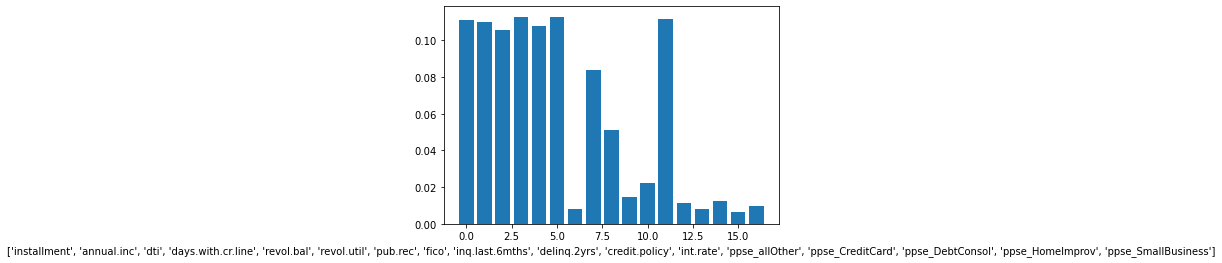

In [104]:
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.xlabel([x for x in X_train.columns])
pyplot.show()

In [105]:
scores = cross_val_score(loan_RFC, x_train_bss, y_train_b, cv=10)
scores
#array([0.94879518, 0.95858434, 0.96385542, 0.99472892, 0.99397136,
#       0.99397136, 0.99472494, 0.99698568, 0.71891485, 0.50791258])

array([0.94879518, 0.95858434, 0.96385542, 0.99472892, 0.99397136,
       0.99397136, 0.99472494, 0.99698568, 0.71891485, 0.50791258])

In [106]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#0.91 accuracy with a standard deviation of 0.16

0.91 accuracy with a standard deviation of 0.16


In [107]:
#RandomForestRegressor
y_trainR=y_train+1  #to avoid division by zero in accuracy
y_testR=y_test+1
loan_RFR=RandomForestRegressor(n_estimators=100, random_state=12)
loan_RFR.fit(X_train,y_trainR)

RandomForestRegressor(random_state=12)

In [108]:
#Predict the response for test dataset
y_predR = loan_RFR.predict(X_test)

In [109]:
# Calculate the absolute errors
errors = abs(y_predR - y_testR)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 0.19 degrees.

Mean Absolute Error: 0.19 degrees.


In [110]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_testR)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 83.45 %.

Accuracy: 83.46 %.


In [111]:
#feature importance:
importancesR=loan_RFR.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importancesR)):
	print('Feature: {}, Score: {}'.format(i,v))

Feature: installment, Score: (0, 0.11603336149777116)
Feature: annual.inc, Score: (1, 0.11529549934437693)
Feature: dti, Score: (2, 0.11089439889482118)
Feature: days.with.cr.line, Score: (3, 0.11979845910055095)
Feature: revol.bal, Score: (4, 0.10919313310542465)
Feature: revol.util, Score: (5, 0.11447168719938595)
Feature: pub.rec, Score: (6, 0.00702133267296314)
Feature: fico, Score: (7, 0.06646134829725114)
Feature: inq.last.6mths, Score: (8, 0.03732861573521697)
Feature: delinq.2yrs, Score: (9, 0.012652619899380085)
Feature: credit.policy, Score: (10, 0.028771301839744044)
Feature: int.rate, Score: (11, 0.11998936317681054)
Feature: ppse_allOther, Score: (12, 0.009616079113331809)
Feature: ppse_CreditCard, Score: (13, 0.007395227562244778)
Feature: ppse_DebtConsol, Score: (14, 0.009904932817786467)
Feature: ppse_HomeImprov, Score: (15, 0.005646205083683713)
Feature: ppse_SmallBusiness, Score: (16, 0.009526434659256481)


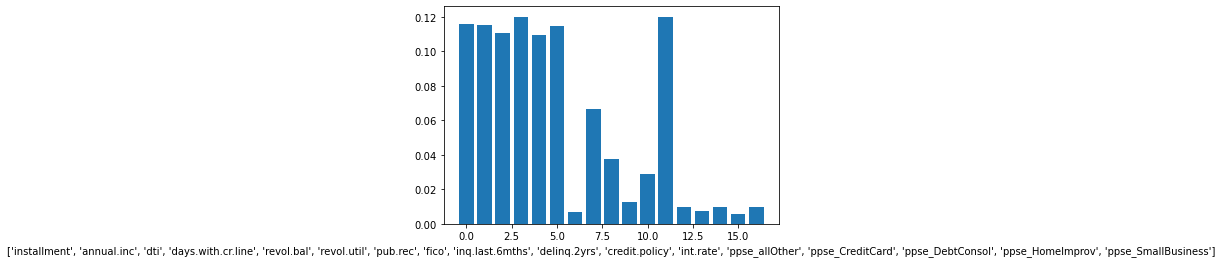

In [112]:
# plot feature importance
pyplot.bar([x for x in range(len(importancesR))], importancesR)
pyplot.xlabel([x for x in X_train.columns])
pyplot.show()

In [113]:
importances-importancesR
#the change in importances of the variables between two methods is minimum

array([-0.00487802, -0.00515895, -0.00544991, -0.00697473, -0.00157759,
       -0.00180054,  0.00111923,  0.01761536,  0.01384431,  0.00199527,
       -0.00659389, -0.00815819,  0.001736  ,  0.00059889,  0.00277727,
        0.00077275,  0.00013274])